## Problem 1: Expectation-Maximization Algorithm for Clustering

Implement expectation-maximization algorithm for Gaussian mixture models (see the EM algorithm below) in Python and call this program Gk. As you present your code explain your protocol
for
1. initializing each Gaussian
2. deciding ties
3. stopping criteria

In [64]:
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
import numpy as np
import random
import copyl
n_features=3
centers=3
n_samples=10
X, y = make_blobs(n_samples=10,n_features=3, centers=3, random_state=0)

muu=[]

for i in range(centers):
    j=random.randint(0,len(X)-1)
    muu.append(X[j])

Prob_Covar =[1/centers for i in range(centers)]

Covar=[[[1 if i==j else 0 for i in range(n_features) ]for j in range(n_features)]for k in range(centers)]

Trans_X=np.transpose(X)


weight=[[0 for i in range(centers)] for j in range(n_samples)]

muu2=[[0 for i in range(n_features)] for j in range(centers)]
muu_difference=[[0 for i in range(n_features)] for j in range(n_features)]

count,mse=0,0
error = 999
epsilon=0.0001
denominator=[0 for i in range(centers)]

while error>epsilon:
    temp=0
    for j in range(n_samples):
         for i in range(centers):
            likelihood = multivariate_normal.pdf(X[j],mean=muu[i],cov=Covar[i],allow_singular=True)
            weight[j][i]= likelihood * Prob_Covar[i]
            
         
    for j in range(n_samples):
            weight[j]= weight[j]/np.sum(weight[j])
               
    Trans_weight=np.transpose(weight)

    muu2=np.dot(Trans_weight,X)
    for i in range(centers):
        muu2[i]=muu2[i]/np.sum(Trans_weight[i])
        Prob_Covar[i] = np.sum(Trans_weight[i])/n_samples
        
    for i in range(centers):
        temp=0
        for j in range(n_samples):
            muu_difference=np.subtract(X[j],muu[i]).reshape(n_features,1)
            Trans_muu_difference= np.reshape(muu_difference,(1,n_features))
            temp += weight[j][i] * np.dot(muu_difference,Trans_muu_difference)

        Covar[i] = temp / np.sum(Trans_weight[i])

    mse = np.subtract(muu,muu2)
    

    muu=copy.deepcopy(muu2)

    mse=np.square(mse)

    error = np.sum(mse)
    count+=1   
       
print("The converged matrix is")
print("\n")
print(X)
print("\n")
print("The number of iterations are",count) 

The converged matrix is


[[ 0.33096604 -1.76905353  4.43227355]
 [ 0.56460626 -1.4795392   4.38062271]
 [-2.32653378  9.23093229 11.06073926]
 [ 2.05708199  4.78809948  2.634408  ]
 [ 0.93110259 -0.84633677  1.35438557]
 [-1.81777304  8.01084655  8.81074967]
 [ 2.24238861  3.79791079  4.6004683 ]
 [ 1.25146839  3.34303272  2.4321945 ]
 [ 0.79468751  5.71399196  1.68079583]
 [ 0.28677335  8.40190005  9.4225203 ]]


The number of iterations are 2


## Problem 2: Analysis of the EM over Real-world Data Sets

Run your EM program, Gk, against the Ringnorm and Ionosphere data sets. Discuss your results.

• Ringnorm Data Set
• Ionosphere Data Set

Run Gk with k = 2, . . . , 5 (20 runs each for each k). Report error rates and iteration countsfor each k using whisker plots.

clusters= 2
clusters= 3
clusters= 4
clusters= 5


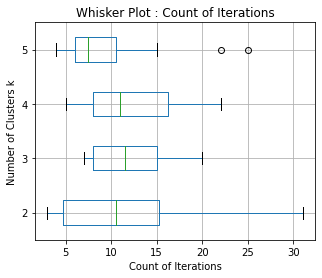

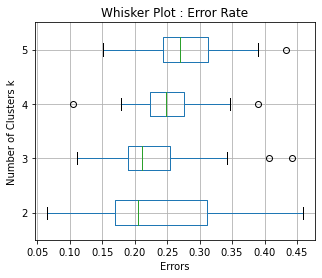

In [65]:
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
import numpy as np
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt

def Gk(X,n_samples,n_features,centers):
    Prob_Covar =[1/centers for i in range(centers)]
    Covar=[[[1 if i==j else 0 for i in range(n_features) ]for j in range(n_features)]for k in range(centers)]
    Trans_X=np.transpose(X)
    muu=[]
    for i in range(centers):
        j=random.randint(0,len(X)-1)
        muu.append(X[j])
    weight=[[0 for i in range(centers)] for j in range(n_samples)]
    muu2=[[0 for i in range(n_features)] for j in range(centers)]
    muu_difference=[[0 for i in range(n_features)] for j in range(n_features)]
    count,mse=0,0
    error = 999
    epsilon=0.0001
    denominator=[0 for i in range(centers)]
    while error>epsilon:
        temp=0
        for j in range(n_samples):
             for i in range(centers):
                likelihood = multivariate_normal.pdf(X[j],mean=muu[i],cov=Covar[i],allow_singular=True)
                weight[j][i]= likelihood * Prob_Covar[i]           
         
        for j in range(n_samples):
                weight[j]= weight[j]/np.sum(weight[j])    
    
        Trans_weight=np.transpose(weight)

        muu2=np.dot(Trans_weight,X)
        for i in range(centers):
            muu2[i]=muu2[i]/np.sum(Trans_weight[i])
            Prob_Covar[i] = np.sum(Trans_weight[i])/n_samples
        
        for i in range(centers):
            temp=0
            for j in range(n_samples):
                muu_difference=np.subtract(X[j],muu[i]).reshape(n_features,1)
                Trans_muu_difference= np.reshape(muu_difference,(1,n_features))
                temp += weight[j][i] * np.dot(muu_difference,Trans_muu_difference)

            Covar[i] = temp / np.sum(Trans_weight[i])
            np.fill_diagonal(Covar[i],Covar[i].diagonal() + 0.0001)

        mse = np.subtract(muu,muu2)
    
        muu=copy.deepcopy(muu2)
        mse=np.square(mse)
        error = np.sum(mse)
        count+=1   
    return weight,muu,count


if __name__ == '__main__':
    df=pd.read_csv('C:/Users/Sushant/Desktop/Applied Algorithms/Assignments/Assignment6/ionosphere.csv',header=None)
    y=df.iloc[:,-1]
    y=np.array(y)
    df.drop(df.columns[len(df.columns)-1],axis=1, inplace=True)
    n_samples,n_features=df.shape
    X=np.array(df)
    good_list=[]
    bad_list=[]
    for i in range(len(X)):
        if y[i] == 'g':
            good_list.append(X[i])
            
        else:
            bad_list.append(X[i])
    good_mu_list=[]
    bad_mu_list=[]
    good_mu_list = np.mean(good_list,axis=0)
    bad_mu_list = np.mean(bad_list,axis=0)
    iteration_list1=[]
    error_list1=[]
    for k in range(2,6):
        print("clusters=",k)
        
        error_list2=[]
        iteration_list2=[]
        for i in range(0,20):
            predicted_labels=[]

            weight,pred_muu,iterations = Gk(X,n_samples,n_features,k)           
            max_rows=np.argmax(weight,axis=1)                 
            for i in range(len(pred_muu)):
                sum_of_squares=np.sum(np.square(good_mu_list - pred_muu[i]))
                good_dist=np.sqrt(sum_of_squares)
                sum_of_squares=np.sum(np.square(bad_mu_list - pred_muu[i]))
                bad_dist=np.sqrt(sum_of_squares)
                if good_dist <= bad_dist:
                    predicted_labels.append([i,'g'])
                else:
                    predicted_labels.append([i,'b'])      
            correct_labels=0
            wrong_labels=0
            for i in range(n_samples):
                for j in range(k):
                    if max_rows[i] in predicted_labels[j]:
                        temp=predicted_labels[j]
                        if temp[1] == y[i]:
                            correct_labels += 1
                        else:
                            wrong_labels += 1

            error_rate= wrong_labels/(wrong_labels+ correct_labels)
            error_list2.append(error_rate)
            iteration_list2.append(iterations)
        error_list1.append(error_list2)
        iteration_list1.append(iteration_list2)
    df = pd.DataFrame(iteration_list1, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker Plot : Count of Iterations')
    plt.xlabel("Count of Iterations")
    plt.ylabel("Number of Clusters k")
    plt.show()  
    
    df = pd.DataFrame(error_list1, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker Plot : Error Rate')
    plt.xlabel("Errors")
    plt.ylabel("Number of Clusters k")
    plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
import numpy as np
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt

def Gk(X,n_samples,n_features,centers):
    Prob_Covar =[1/centers for i in range(centers)]
    Covar=[[[1 if i==j else 0 for i in range(n_features) ]for j in range(n_features)]for k in range(centers)]
    Trans_X=np.transpose(X)
    muu=[]
    for i in range(centers):
        j=random.randint(0,len(X)-1)
        muu.append(X[j])
    weight=[[0 for i in range(centers)] for j in range(n_samples)]
    muu2=[[0 for i in range(n_features)] for j in range(centers)]
    muu_difference=[[0 for i in range(n_features)] for j in range(n_features)]
    count,mse=0,0
    error = 999
    epsilon=0.0001
    denominator=[0 for i in range(centers)]
    while error>epsilon:
        temp=0
        for j in range(n_samples):
             for i in range(centers):
                likelihood = multivariate_normal.pdf(X[j],mean=muu[i],cov=Covar[i],allow_singular=True)
                weight[j][i]= likelihood * Prob_Covar[i]
                
        for j in range(n_samples):
                weight[j]= weight[j]/np.sum(weight[j])  
    
        Trans_weight=np.transpose(weight)
        muu2=np.dot(Trans_weight,X)
        for i in range(centers):
            muu2[i]=mu_new[i]/np.sum(Trans_weight[i])
            Prob_Covar[i] = np.sum(Trans_weight[i])/n_samples
        
        for i in range(centers):
            temp=0
            for j in range(n_samples):
                muu_difference=np.subtract(X[j],muu[i]).reshape(n_features,1)
                Trans_muu_difference= np.reshape(muu_difference,(1,n_features))
                temp += weight[j][i] * np.dot(muu_difference,Trans_muu_difference)
            Covar[i] = temp / np.sum(Trans_weight[i])
            np.fill_diagonal(Covar[i],Covar[i].diagonal() + 0.0001)
        mse = np.subtract(muu,muu2)
    
        muu=copy.deepcopy(muu2)
        mse=np.square(mse)
        error = np.sum(mse)
        count+=1   
    return weight,muu,count


if __name__ == '__main__':
    df=pd.read_csv('C:/Users/Sushant/Desktop/Applied Algorithms/Assignments/Assignment6/Dataset.data', sep="\s+",header=None)
    y=df.iloc[:,-1]
    y=np.array(y)
    df.drop(df.columns[len(df.columns)-1],axis=1, inplace=True)
    n_samples,n_features=df.shape
    X=np.array(df)
    #print(X)
    good_list=[]
    bad_list=[]
    for i in range(len(X)):
        if y[i] == 0:
            good_list.append(X[i])
            
        else:
            bad_list.append(X[i])
    good_mu_list=[]
    bad_mu_list=[]
    good_mu_list = np.mean(good_list,axis=0)
    bad_mu_list = np.mean(bad_list,axis=0)
    iteration_list1=[]
    error_list1=[]
    for k in range(2,6):
        print("clusters=",k)
        
        error_list2=[]
        iteration_list2=[]
        for i in range(20):
            predicted_labels=[]
            weight,pred_muu,iterations = Gk(X,n_samples,n_features,k)
            max_rows=np.argmax(weight,axis=1)             
            for i in range(len(pred_muu)):
                sum_of_squares=np.sum(np.square(good_mu_list - pred_muu[i]))
                good_dist=np.sqrt(sum_of_squares)
                sum_of_squares=np.sum(np.square(bad_mu_list - pred_muu[i]))
                bad_dist=np.sqrt(sum_of_squares)
                if good_dist <= bad_dist:
                    predicted_labels.append([i,0])
                else:
                    predicted_labels.append([i,1])
                
            correct_labels=0
            wrong_labels=0
            for i in range(n_samples):
                for j in range(k):
                    if max_rows[i] in predicted_labels[j]:
                        temp=predicted_labels[j]
                        if temp[1] == y[i]:
                            correct_labels += 1
                        else:
                            wrong_labels += 1
            error_rate= wrong_labels/(wrong_labels+ correct_labels)
            error_list2.append(error_rate)
            iteration_list2.append(iterations)
        error_list1.append(error_list2)
        iteration_list1.append(iteration_list2)
    df = pd.DataFrame(iteration_list1, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False,showfliers=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker Plot : Count of Iterations')
    plt.xlabel("Count of Iterations")
    plt.ylabel("Number of Clusters k")
    plt.show()  
    
    df = pd.DataFrame(iteration_list1, index=[i for i in range(2,6)])
    df.T.boxplot(vert=False)
    plt.subplots_adjust(left=0.25)
    plt.title('Whisker Plot : Error Rate')
    plt.xlabel("Error")
    plt.ylabel("Number of Clusters k")
    plt.show()

## Problem 3: Algorithm Design

## Problem 3.1

Given a text D and a pattern P, describe an Ω(d+p) time method for finding the longest prefix of P that is a substring of D. The lengths of D and P are d and p, respectively

## Solution:

1. We have implemented an algorithm to find the longest prefix of the pattern P that is present in text D. The algorithm we used for finding the solution is the KMP(Knuth-Morris-Pratt) algorithm.
2. However, we changed the algorithm to find the prefix as the original KMP algorithm would consider the string as a whole.
3. We then track the patterns or prefixes found in the pattern string using the compute_kmp_fail function. 
4. Then we iterate over the text string. While doing so, supposing that if we reach at index 3 in the pattern string and index 9 in text string and if we don't get a match we do not shift directly to the first element in pattern.
5. Instead we check the prefixes using the fail function and start comparison from the element in between the pattern. 
6. Here if the string gets matched to a certain point so the text has that pattern and now if there is a further match from the point where was a mismatch then the pattern must be there.

In [55]:
def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

def find_kmp(T, P):
    n, m = len(T), len(P)
    #print(n,m)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    count = 0
    while j < n:  # goes till end cause index starts from 0 and < n will make it go to n-1 index which is last element index value
        if T[j] == P[k]:
            if k == m-1:
                count = max(k+1,count)
                return count
            j += 1
            k += 1
            count=max(k,count)
        elif k > 0:
            #k = 0
            k=fail[k-1]
        else:
            j += 1
    return count

T = 'aabcdcdcabyiok'
P = 'cd'

print("The longest length of prefix present in P & T: ",find_kmp(T,P))


T = 'aabcdcdcabyxok'
P = 'c'

print("The longest length of prefix present in P & T: ",find_kmp(T,P))


T = 'zajfjawjfvncvgkuycz'
P = 'lpokjduzajfqw'

print("The longest length of prefix present in P & T: ",find_kmp(T,P))

T = 'SSSNMMXSDD'
P = 'SSASSA'
print("The longest length of prefix present in P & T: ",find_kmp(T,P))

The longest length of prefix present in P & T:  2
The longest length of prefix present in P & T:  1
The longest length of prefix present in P & T:  0
The longest length of prefix present in P & T:  2


## Problem 3.2

X, Y, and Z are three arrays and each has m elements. For an arbitrary integer t, describe O(m^2logm)-time algorithm to determine if there exist numbers, x in X, y in Y, and z in Z, such that t = x+y+z.

## Solution:

1. We have implemented the program to find whether there exist triplets from three given arrays whose sum is equal to the target number.
2. To implement this in O(m^2logm)-time, we have to check for each element in any two out of the given three arrays. For this we iterate over these arrays for m elements which takes O(m) time for each loop. Thus for iterating over both arrays, time taken is O(m^2).
3. We check the difference between our target number and the other two numbers that we get in each iteration from the two arrays and store this difference.
4. We then sort the third array using in-built sort function in order to apply binary search algorithm on the sorted array.
5. This in-built function uses merge sort which takes O(mlogm) time.
6. We then check if the difference which we stored in the earlier step is present in the sorted array using binary search. 
7. This searching takes O(logm) time. So in total our program gives the results in O(m^2logm + mlogm) time. This is equivalent to O(m^2logm) time.

# Pseudo-code:

    input: arrays x , y and z, target
    output: True if triplets are present. False if there are no triplets.
    
    #implement binary search function
    def binarySearch(data,target,low,high):
    Return False IF low>high
    
    else:
        mid = (low + high)//2
        
    Return True if target==data[mid]
   
    elif target<data[mid]:
        return binarySearch(data,target,low,mid-1)
    else:
        return binarySearch(data,target,mid+1,high)
    
    
    def triplet(target,x,y,z):
    z.sort()
    for i in x  do
        for j in y do
            total = target - i -j
            Return True if the function binarySearch(z,total,0,len(z)-1) returns true
    Return False if total not found in array z

In [54]:
def binarySearch(data,target,low,high):
    if low>high:
        return False
    else:
        mid = (low + high)//2
    if target==data[mid]:
        return True
    elif target<data[mid]:
        return binarySearch(data,target,low,mid-1)
    else:
        return binarySearch(data,target,mid+1,high)

def triplet(target,x,y,z):
    z.sort()
    h = set()

    for i in x:
        for j in y:
            total = target - i -j
            if binarySearch(z,total,0,len(z)-1):
                #print('There exist a triplet of numbers in arrays x,y and z whose sum is equal to the target')
                return 'There exist a triplet of numbers in arrays x,y and z whose sum is equal to the target'
    return 'There are no numbers in arrays x,y and z whose sum is equal to the target'


x = [1,2,3,4,5,6,7,1]
y = [99,98,97,96,95,94,93,1]
z = [11,12,13,14,15,16,17,1]
t=111
a=triplet(2,x,y,z)
print("For the target=2,",a)
b=triplet(111,x,y,z)
print("For the target=111,",b)


For the target=2, There are no numbers in arrays x,y and z whose sum is equal to the target
For the target=111, There exist a triplet of numbers in arrays x,y and z whose sum is equal to the target


## Problem 3.3

Describe an efficient algorithm for deleting a string from a compressed trie and analyze its running time.

## Solution:

1. We have designed an algorithm for deleting a string from a compressed trie. This algorithm takes a compressed trie and the string as an input and returns the trie without the string.
2. First we check whether the string is present in the trie or not. If not then we stop then and there itself.
3. If the string is present, we check the node where the string is found. 
4. First we check if the node has a child or not. Also we check if the string is complete or incomplete in the node.
5. For the above conditions, if the node has a child or if the string is incomplete, we do not delete the node and we stop there.
6. If our above conditions are satisfied, we then we delete this node. In this check what is the parent node of the node having our string. 
7. Then we check if the parent node has any other child. If yes, then we compress this child into the parent node i.e. we merge the contents of child node into parent node and then we delete the child node so at the end we only get the parent node.
8. The time complexity for this algorithm is O(n) where n is the length of the string which is to be deleted.


# Pseudo-code:

    input: compressed trie CT, string to be deleted S
    output: compressed trie CT without the string S
    
    def compTrieStringDel(CT,S):
        #check if the string is present in the compressed trie CT
        Return False If S not in CT
        
        else:
            # n is the node having the string S
            Return False If S is not the entire string or if node n has a child
            #This is because we are not allowed to delete an internal node
            
            
            # p is the parent node of n
            delete node n
            
            Check If p has another child node c:
                #p.data indicates the data or string present at node p
                p.data = p.data + c.data
                delete node c
                #In the above steps we are compressing the child node c with parent p i.e merging c into p
                
           Return True